In [1]:
import matplotlib.pyplot as plt
original_grid = plt.grid

# Define a wrapper function that applies custom grid and tick settings
def grid_proxy(*args, **kwargs):
    # Apply custom grid settings
    kwargs.setdefault('which', 'both')
    kwargs.setdefault('linestyle', '--')
    kwargs.setdefault('linewidth', 0.5)
    
    # Call the original plt.grid function with the updated settings
    original_grid(*args, **kwargs)
    
    # Automatically turn on minor ticks
    plt.minorticks_on()
    
    # Apply custom minor tick parameters
    plt.tick_params(which='minor', length=4, color='r')

# Override plt.grid with the proxy function
plt.grid = grid_proxy

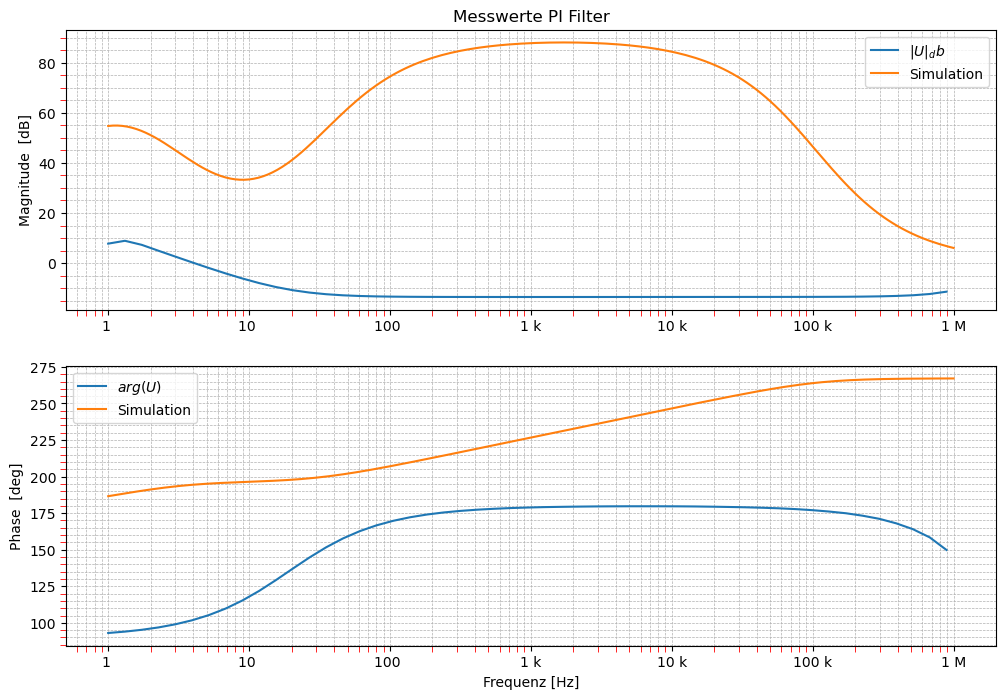

In [20]:
import pandas as pd

from matplotlib.ticker import FuncFormatter
import numpy as np

# Loading the data from the CSV file
df = pd.read_csv("PI_Filter_versuch5_besser.csv", delimiter=',', comment='#',encoding = 'ISO-8859-1')
df2= pd.read_csv("pifilter_simulation.csv", delimiter=';')
# Helper functions for formatting labels
def format_with_unit(value, unit):
    """Format a number and append a unit, removing trailing zeros."""
    formatted_value = '{:1.2f}'.format(value).rstrip('0').rstrip('.')
    return formatted_value + ' ' + unit if formatted_value != '' else '0 ' + unit

def format_freq(x, pos):
    """Format frequency axis with SI unit prefixes."""
    if x >= 1e9:
        return format_with_unit(x * 1e-9, 'G')
    elif x >= 1e6:
        return format_with_unit(x * 1e-6, 'M')
    elif x >= 1e3:
        return format_with_unit(x * 1e-3, 'k')
    else:
        return format_with_unit(x, '')

def format_phase(x, pos):
    """Add degree symbol to phase axis."""
    return '{:1.0f}\u00B0'.format(x)  # \u00B0 is the unicode for degree symbol

def format_time(x, pos):
    """Format time axis with SI unit prefixes."""
    if x >= 1:
        return format_with_unit(x, 's')
    elif x >= 1e-3:
        return format_with_unit(x * 1e3, 'ms')
    elif x >= 1e-6:
        return format_with_unit(x * 1e6, 'µs')
    else:
        return format_with_unit(x * 1e9, 'ns')



plt.figure(figsize=(12, 8))
plt.subplot(2, 1,1 )
#	#Digilent WaveForms Network Analyzer - Bode
#20	Frequency (Hz),Channel 1 Magnitude (dB),Channel 2 Magnitude (dB),Channel 2 Phase (deg)
plt.semilogx(df['Frequency (Hz)'], df['Channel 2 Magnitude (dB)'],label="$|U|_db$")
plt.semilogx(df2['frequency'], df2['V(auspifilter)5'], label='Simulation')
plt.title('Messwerte PI Filter')
plt.ylabel('Magnitude  [dB]')
plt.legend()
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_freq))
plt.grid(True)
plt.subplot(2, 1,2 )
plt.semilogx(df['Frequency (Hz)'], df['Channel 2 Phase (deg)'],label="$arg(U)$")
plt.semilogx(df2['frequency'], df2['V(auspifilter)9']+360, label='Simulation')
plt.ylabel('Phase  [deg]')
plt.xlabel('Frequenz [Hz]')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_freq))
plt.grid()
plt.legend()
plt.savefig("pi-filter-messung.pdf")
plt.show()

In [12]:
df2= pd.read_csv("pifilter_simulation.csv", delimiter=';')

In [13]:
df2

,frequency,V(auspifilter)5,V(auspifilter)9,Unnamed: 3
0,1.00000,54.75900,-173.4040,NaN
1,1.07978,54.92350,-172.8720,NaN
2,1.16591,54.93770,-172.3400,NaN
3,1.25893,54.80350,-171.8110,NaN
4,1.35936,54.52420,-171.2880,NaN
...,...,...,...,...
176,735642.00000,8.16857,-92.9332,NaN
177,794328.00000,7.57234,-92.9207,NaN
178,857696.00000,7.01869,-92.9099,NaN
179,926119.00000,6.50477,-92.9007,NaN
